## Identifying the sampling adequacy
### To perform factor analysis we need to measure the factorability or the sampling adequacy

#### Bartlett test: value < 0.5 is significant
#### KMO test: value > 0.5 is significant


In [18]:
!pip3.12 install scikit-learn matplotlib --quiet
!pip3.12 install factor_analyzer --quiet


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


### Load the dataset

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Bartletts test of sphericity

In [4]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square, p_value = calculate_bartlett_sphericity(x)
print("the chi square value of bartlett test: ", chi_square)
print("the p_value of bartlett test: ", p_value)

the chi square value of bartlett test:  3385.3091508112166
the p_value of bartlett test:  0.0


### Here we can see that the p value is 0.0 hence statistically significant

## Kaiser Mayer Olkin Test

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_values, kmo_model = calculate_kmo(x)
print("the kmo values per variable: ", kmo_values)
print("the kmo model value: ", kmo_model)

the kmo values per variable:  [0.87688315 0.83931477 0.87836329 0.82998378 0.39034472 0.41302883
 0.33190444 0.78558999 0.42466801 0.92847504]
the kmo model value:  0.535098593826483


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


### Here KMO value os 0.53 which is good but not excellent
### Since the conditon of adequacy is met FA can be executed

## Eigen values

In [15]:
fa = FactorAnalyzer()
fa.fit(x)
eigen_value, value = fa.get_eigenvalues()
print("the eigen values are: ", eigen_value)
print("the value is: ", value)

the eigen values are:  [4.02421075 1.49231968 1.20596626 0.9554764  0.66218139 0.60271708
 0.53656565 0.43368204 0.07832002 0.00856073]
the value is:  [ 3.72776268  1.57292807  0.88828319  0.21604989  0.11894462  0.09058512
  0.01704489 -0.07504411 -0.1919672  -0.28880206]


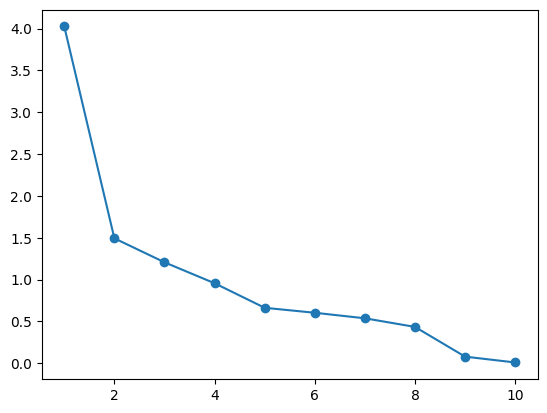

In [22]:
import matplotlib.pyplot as plt
plt.scatter(range(1, x.shape[1]+1), eigen_value)
plt.plot(range(1, x.shape[1]+1), eigen_value)

### the eigen value > 1 for only 3 factors, hence optimum number of factors = 3

In [26]:
fa.fit(x, 3)
print("factor loadings are: ", fa.loadings_)
print("factor variance: ", fa.get_factor_variance())

factor loadings are:  [[ 0.04598849  0.10875004  0.48976078]
 [-0.0711421  -0.33665947  0.12479522]
 [ 0.00161047 -0.18685147  0.45864076]
 [-0.13233787  0.08184312  0.79071655]
 [ 1.02583404  0.29048438  0.13815557]
 [ 0.9374079  -0.06517428 -0.12331425]
 [ 0.16998396  1.12661703  0.18173581]
 [ 0.47343423 -0.73735389 -0.08979876]
 [ 0.18583927 -0.20323689  0.4644602 ]
 [ 0.03808345 -0.07615782  0.57741002]]
factor variance:  (array([2.24478219, 2.11546874, 1.71553417]), array([0.22447822, 0.21154687, 0.17155342]), array([0.22447822, 0.43602509, 0.60757851]))
